# Visualizations notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## VoxCeleb trainer benchmark

In [2]:
# values = [2.23, 3.13, 4.22, 6.82, 11.94, 0.0, 7.10, 8.37, 10.80, 16.00, 0.0, 23.53, 25.19, 27.76, 31.38]

# type_of_audio = ['clean', 'snr 17.5', 'snr 12.5', 'snr 7.5', 'snr 2.5', 'clean', 'snr 17.5', 'snr 12.5', 'snr 7.5', 'snr 2.5',
#                  'clean', 'snr 17.5', 'snr 12.5', 'snr 7.5', 'snr 2.5']

# denoised_or_not = ['pure','pure','pure','pure','pure',
#                    'denoised','denoised','denoised','denoised','denoised',
#                    'denoised_v2', 'denoised_v2', 'denoised_v2', 'denoised_v2', 'denoised_v2']

In [3]:
#values = [2.23, 3.13, 4.22, 6.82, 11.94, 0.0, 7.10, 8.37, 10.80, 16.00, 0.0, 23.53, 25.19, 27.76, 31.38]
values = [2.23, 3.07, 4.15, 6.63, 12.31, 0.0, 7.20, 8.15, 10.81, 16.30, 0.0, 3.10, 3.91, 6.20, 11.18]

type_of_audio = ['clean', 'snr 17.5', 'snr 12.5', 'snr 7.5', 'snr 2.5', 'clean', 'snr 17.5', 'snr 12.5', 'snr 7.5', 'snr 2.5',
                 'clean', 'snr 17.5', 'snr 12.5', 'snr 7.5', 'snr 2.5']

denoised_or_not = ['pure','pure','pure','pure','pure',
                   'best_siwis','best_siwis','best_siwis','best_siwis','best_siwis',
                   'best_voxceleb2_test', 'best_voxceleb2_test', 'best_voxceleb2_test',
                   'best_voxceleb2_test', 'best_voxceleb2_test']

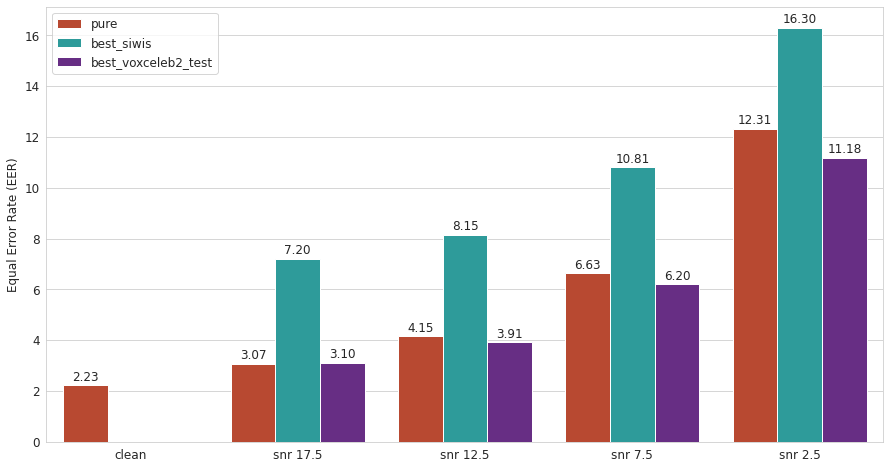

In [17]:
plt.figure(figsize = (15, 8))
colors = ['#CF3B1A', '#1CADAC', '#6B2092']
sns.set_style('whitegrid')
splot = sns.barplot(x = np.array(type_of_audio), y = np.array(values), hue = np.array(denoised_or_not), 
            palette = sns.color_palette(colors))
plt.ylabel('Equal Error Rate (EER)', fontdict = {'fontsize':12})
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.legend(fontsize = 12)
for p in splot.patches:
    if p.get_height() != 0.0:
        splot.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()+.8), 
                       ha = 'center', va = 'center', 
                       size=12,
                       xytext = (0, -12), 
                       textcoords = 'offset points')
#plt.savefig('../plots/SpeakerVerificationPerformanceV3.png')

## GridSearch VoxCeleb trainer between denoised and noisy audio

| coeff_noise/snr | 2.5 | 7.5 | 12.5 | 17.5 |
|:-|:-|:-|:-|:-|
|0.0|16.00|10.80|8.37|7.10|
|0.1|13.45|8.51|6.11|4.97|
|0.2|12.51|7.59|5.23|4.14|
|0.3|12.26|7.13|4.77|3.71|
|0.4|11.97|7.02|4.50|3.46|
|0.5|11.82|6.89|4.38|3.28|
|0.6|11.78|6.82|4.27|3.18|
|0.7|11.78|**6.79**|4.22|3.13|
|0.8|**11.76**|6.82|4.19|**3.10**|
|0.9|11.85|6.80|**4.17**|3.13|
|1.0|11.94|6.82|4.22|3.13|

In [4]:
x_axis = ['0.0\nonly denoised', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, '1.0\nonly noisy']
values_25 = [16.00, 13.45, 12.51, 12.26, 11.97, 11.82, 11.78, 11.78, 11.76, 11.85, 11.94]
values_75 = [10.80, 8.51, 7.59, 7.13, 7.02, 6.89, 6.82, 6.79, 6.82, 6.80, 6.82]
values_125 = [8.37, 6.11, 5.23, 4.77, 4.50, 4.38, 4.27, 4.22, 4.19, 4.17, 4.22]
values_175 = [7.10, 4.97, 4.14, 3.71, 3.46, 3.28, 3.18, 3.13, 3.10, 3.13, 3.13]
ys = [np.min(values_25), np.min(values_75), np.min(values_125), np.min(values_175)]
xs = [np.argmin(values_25), np.argmin(values_75), np.argmin(values_125), np.argmin(values_175)]

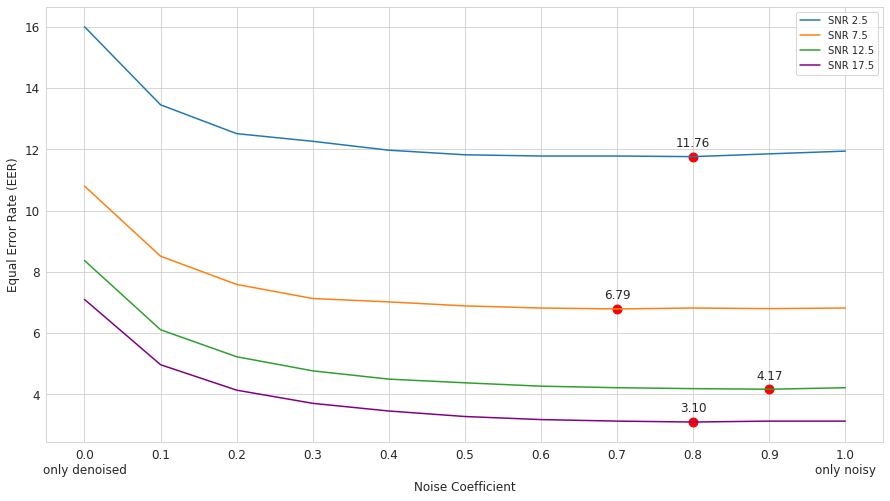

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize = (15, 8))
plt.plot(values_25, label = 'SNR 2.5')
plt.plot(values_75, label = 'SNR 7.5')
plt.plot(values_125, label = 'SNR 12.5')
plt.plot(values_175, label = 'SNR 17.5', color = 'purple')
plt.scatter(y = ys,
            x = xs,
            color = 'red',
            alpha = 1,
            s = 80)
for x, y in zip(xs, ys):
  label = '{:.2f}'.format(y)
  plt.annotate(label, 
               (x, y),
               textcoords = 'offset points',
               xytext = (0, 10),
               ha = 'center',
               size = 12)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels = x_axis, size = 12)
plt.yticks(size = 12)
plt.xlabel('Noise Coefficient', size = 12)
plt.ylabel('Equal Error Rate (EER)', size = 12)
plt.legend()
#plt.savefig('../plots/GridSearchNoiseCoeff.png')